In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('swiss_data.csv')
df=df.dropna(axis=1, how='all')
df=df.dropna(axis = 0, how = 'all')
df.head()

,date,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,08-11-2020,Switzerland,2020-08-12 04:27:29,46.8182,8.2275,36895,1835,32400.0,2660.0,Switzerland,426.304200,4.973574
1,08-12-2020,Switzerland,2020-08-13 04:29:15,46.8182,8.2275,37169,1835,32700.0,2634.0,Switzerland,429.470139,4.936910
2,08-13-2020,Switzerland,2020-08-14 04:51:19,46.8182,8.2275,37403,1836,32700.0,2867.0,Switzerland,432.173898,4.908697
3,08-14-2020,Switzerland,2020-08-15 04:27:31,46.8182,8.2275,37671,1836,32900.0,2935.0,Switzerland,435.270511,4.873776
4,08-15-2020,Switzerland,2020-08-16 04:27:42,46.8182,8.2275,37924,1838,33200.0,2886.0,Switzerland,438.193806,4.846535


In [3]:
df=df[['date','Confirmed']]

In [4]:
df.head()

,date,Confirmed
0,08-11-2020,36895
1,08-12-2020,37169
2,08-13-2020,37403
3,08-14-2020,37671
4,08-15-2020,37924


In [5]:
df1=df['Confirmed']

In [6]:
df_dff_d=df1.diff().to_frame()
df_dff_d["day"]=[*range(0, len(df_dff_d.index))]

In [7]:
df_dff_d#difference in # confirmed between two consecutive days

,Confirmed,day
0,NaN,0
1,274.0,1
2,234.0,2
3,268.0,3
4,253.0,4
...,...,...
581,29033.0,581
582,36038.0,582
583,34373.0,583
584,27605.0,584


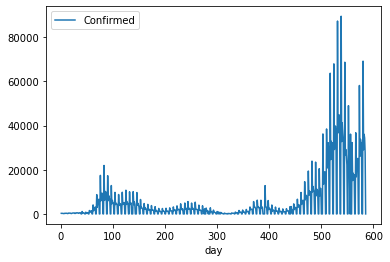

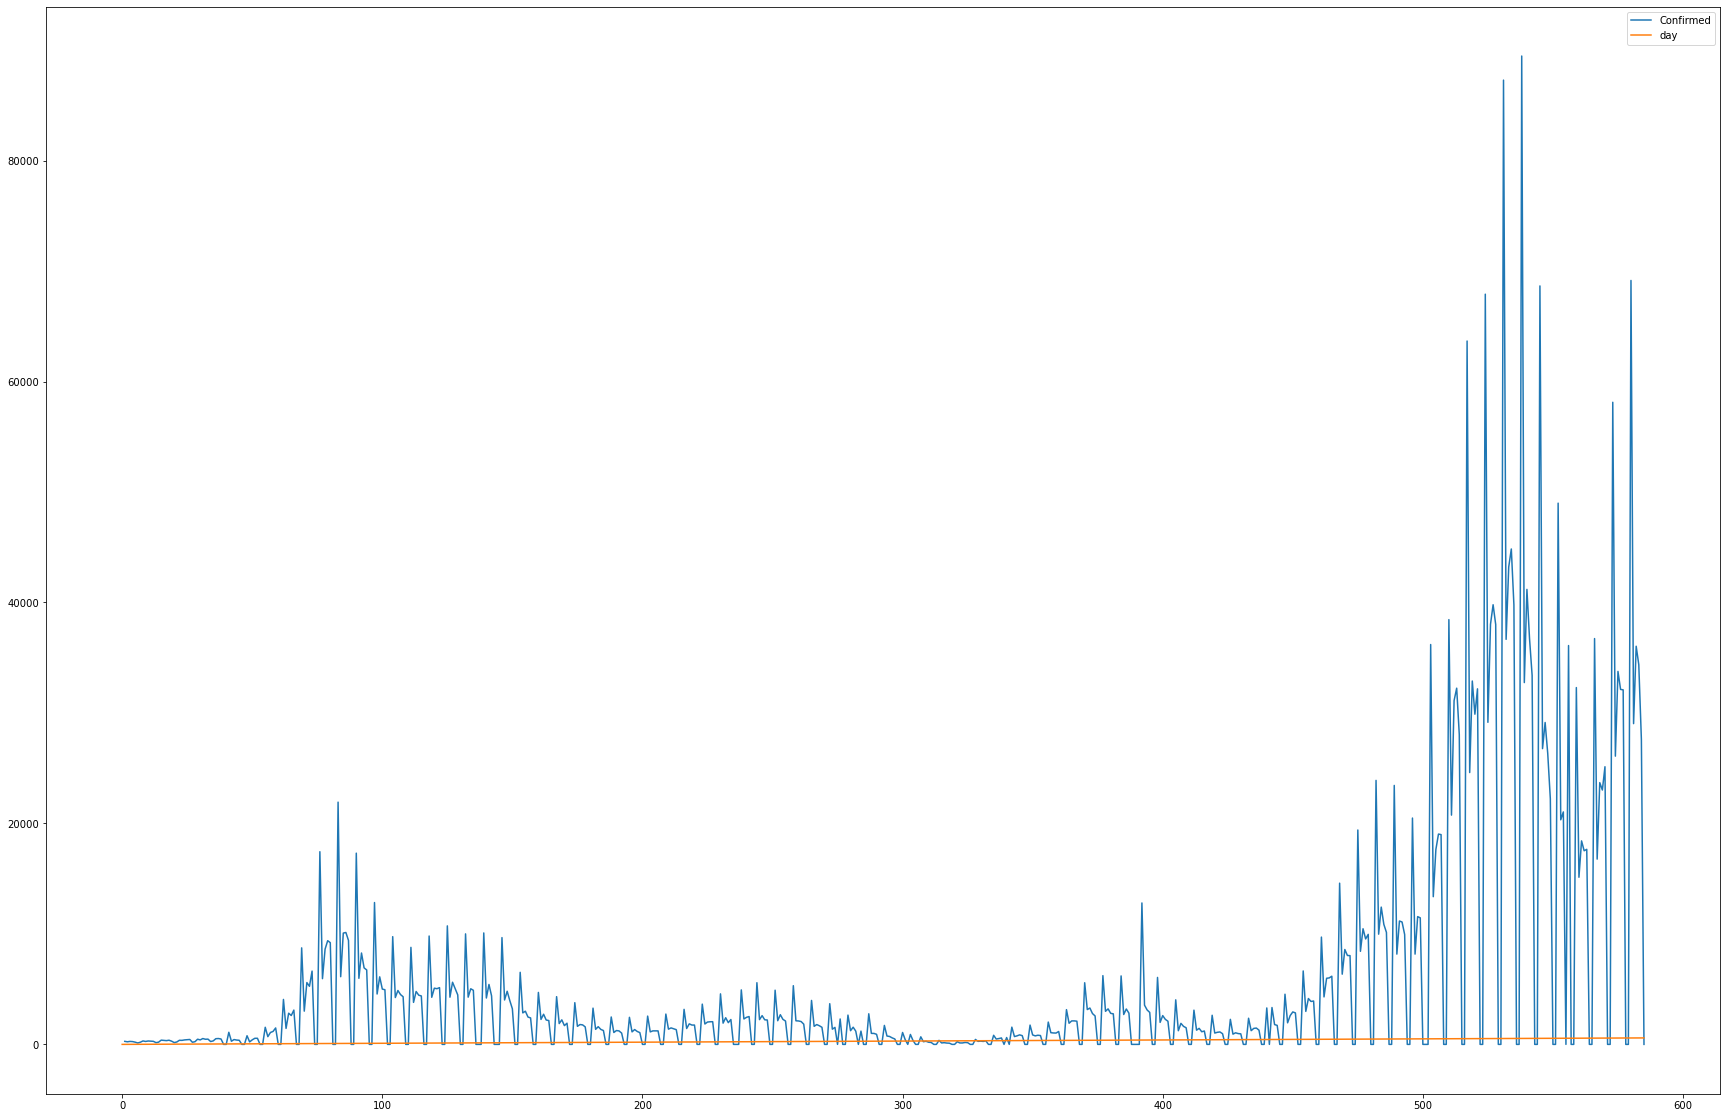

In [8]:
df_dff_d.plot(x='day',y='Confirmed', kind = 'line')	
df_dff_d.plot(figsize=(30,20))

In [9]:
df_cd=pd.concat([df['date'], df_dff_d['Confirmed']], axis=1, keys=['date', 'Confirmed'])

In [10]:
df_cd.drop(index=df.index[-1], axis=0,inplace=True)

In [11]:
df_cd=df_cd.dropna()

In [12]:
df_cd#difference in # confirmed between two consecutive days

,date,Confirmed
1,08-12-2020,274.0
2,08-13-2020,234.0
3,08-14-2020,268.0
4,08-15-2020,253.0
5,08-16-2020,200.0
...,...,...
580,03-14-2022,69146.0
581,03-15-2022,29033.0
582,03-16-2022,36038.0
583,03-17-2022,34373.0


In [13]:
s=df1.diff()
df_cw=s.groupby(s.index // 7).sum().to_frame()##difference in # confirmed between consecutive weeks

In [14]:
df_cw["day"]=[*range(0, len(df_cw.index))]
df_cw

,Confirmed,day
0,1357.0,0
1,1808.0,1
2,2117.0,2
3,2415.0,3
4,2844.0,4
...,...,...
79,109767.0,79
80,105460.0,80
81,146738.0,81
82,193215.0,82


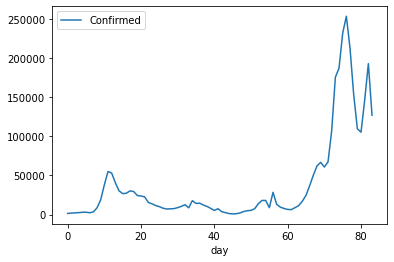

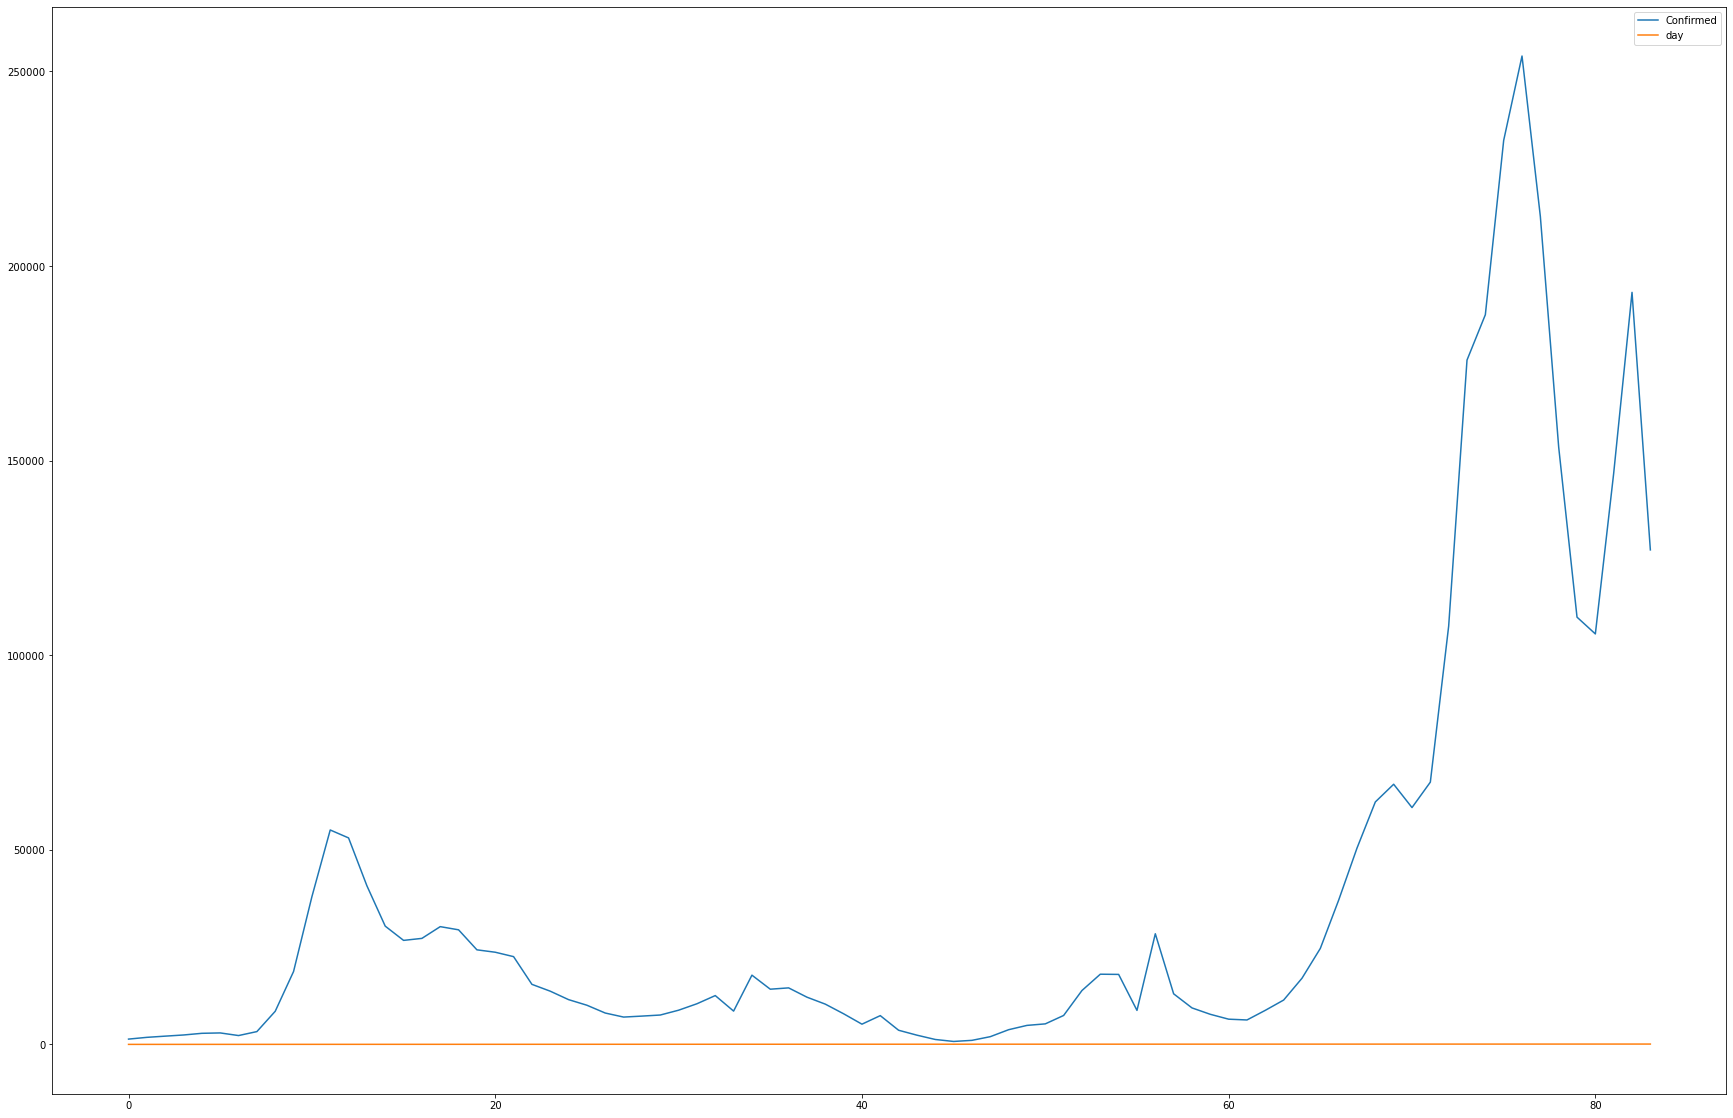

In [15]:
df_cw.plot(x='day',y='Confirmed', kind = 'line')	
df_cw.plot(figsize=(30,20))

In [16]:
df2=df_cw
df2.rename(columns={'day': 'ds', 'Confirmed': 'y'}, inplace=False)
df2

,Confirmed,day
0,1357.0,0
1,1808.0,1
2,2117.0,2
3,2415.0,3
4,2844.0,4
...,...,...
79,109767.0,79
80,105460.0,80
81,146738.0,81
82,193215.0,82


In [17]:
from datetime import datetime

In [18]:
a=pd.date_range(start="01-22-2020",end="03-19-2022")



In [19]:
##############prophet on cumulative

In [20]:
from prophet import Prophet
import datetime

In [21]:
df["date"]=df["date"].apply(lambda x: datetime.datetime.strptime(x,"%m-%d-%Y").strftime("%Y-%m-%d"))
df.rename(columns={'date': 'ds', 'Confirmed': 'y'}, inplace=True)


In [22]:
df

,ds,y
0,2020-08-11,36895
1,2020-08-12,37169
2,2020-08-13,37403
3,2020-08-14,37671
4,2020-08-15,37924
...,...,...
581,2022-03-15,3170937
582,2022-03-16,3206975
583,2022-03-17,3241348
584,2022-03-18,3268953


In [23]:
m=Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


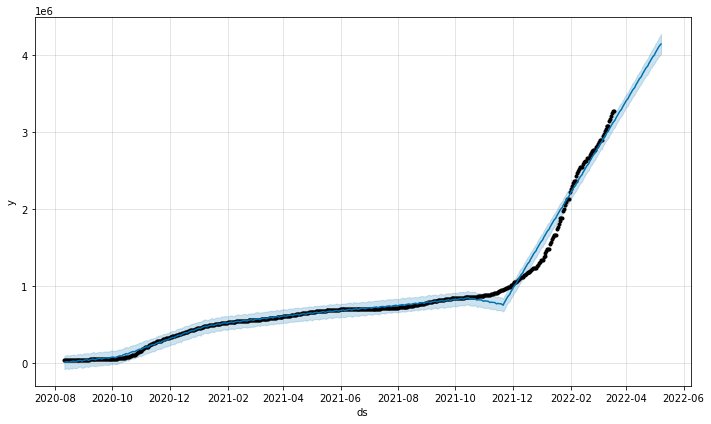

In [24]:
future = m.make_future_dataframe(periods=50)
forecast = m.predict(future)
fig1 = m.plot(forecast)

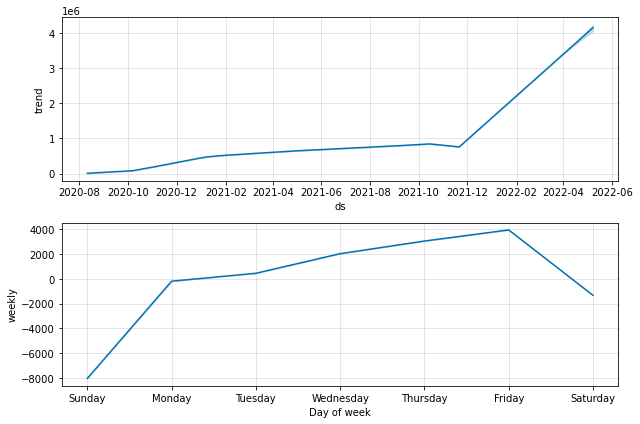

In [44]:
fig2 = m.plot_components(forecast)

AMRS


In [25]:
df_cw

,Confirmed,day
0,1357.0,0
1,1808.0,1
2,2117.0,2
3,2415.0,3
4,2844.0,4
...,...,...
79,109767.0,79
80,105460.0,80
81,146738.0,81
82,193215.0,82


In [67]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [49]:
df_cw['Confirmed']

0       1357.0
1       1808.0
2       2117.0
3       2415.0
4       2844.0
        ...   
79    109767.0
80    105460.0
81    146738.0
82    193215.0
83    127049.0
Name: Confirmed, Length: 84, dtype: float64

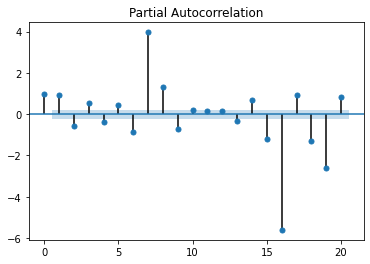

In [45]:
plot_pacf(df_cw['Confirmed']);

For AR process
<br>Order p is the lag value after which PACF plot crosses the upper confidence interval for the first time. p=1? 7?
<br>In the above plot we can see that lags upto 1 have good correlation before the plot first cuts the upper confidence interval. This is our p value i.e the order of our AR process. We can model given AR process using linear combination of first 1 lags.
<br> We should expect our AR process to show gradual decrease in the ACF plot since being an AR process its present has good correlation with the past lags. We expect PACF to have sharp fall after near lags as these lags near to present can capture the variation so well that we don’t need past lags to predict present.

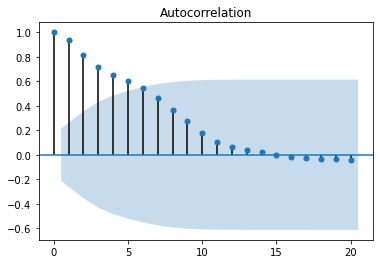

In [43]:
plot_acf(df_cw['Confirmed']);

In the above correlation plot dotted lines represent the confidence band, with center dotted line represents mean and upper and lower dotted line represent boundries based on 95% confidence interval.
<br>Notice that we have good positive correlation with the lags upto 6, this is the point where ACF plot cuts the upper confidence threshold. Although we have good correlation upto 6th lag we cannot use all of them as it will create multi-collinearity problem, thats why we turn to PACF plot to get only the most relevant lags!
<br>for AR above

Order q of the MA process is obtained from the ACF plot, this is the lag after which ACF crosses the upper confidence interval for the first time.q=6

PACF captures correlations of residuals and the time series lags
<br>being a MA process, it doesn’t have the seasonal or trend components so the ACF plot will capture the correlations due residual components only. 


In [50]:
#augmented Dicker-Fuller test:
ad_fuller_result = adfuller(df_cw['Confirmed'])
ad_fuller_result

(-2.4153912839774256,
 0.13743937079879825,
 10,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 1573.972429692447)

In [51]:
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.4153912839774256
p-value: 0.13743937079879825


Here, the p-value is larger than 0.05, meaning the we cannot reject the null hypothesis stating that the time series is non-stationary.

<br>Therefore, we must apply some transformation and some differencing to remove the trend and remove the change in variance.
<br>take the log difference of the time series. This is equivalent to taking the logarithm of the EPS, and then apply differencing once. Note that because we are differencing once, we will get rid of the first data point.


In [52]:
# Take the log difference to make data stationary
df_cw['Confirmed'] = np.log(df_cw['Confirmed'])
df_cw['Confirmed'] = df_cw['Confirmed'].diff()
df_cw= df_cw.drop(df_cw.index[0])

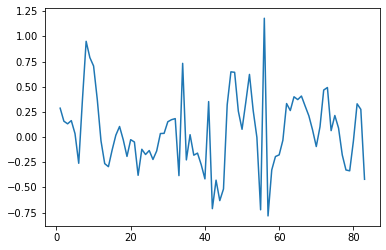

In [55]:
plt.plot(df_cw['Confirmed'])#plot the new transformed data:

In [56]:
#apply the augmented Dickey-Fuller test again to test for stationarity.
ad_fuller_result = adfuller(df_cw['Confirmed'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.478268057466016
p-value: 0.00021520501022895543


 the p-value is less than 0.05, we reject the null hypothesis, and assume that the time series is stationary.
 <br>Now, let’s look at the PACF and ACF to see if we can estimate the order of one of the processes in play.

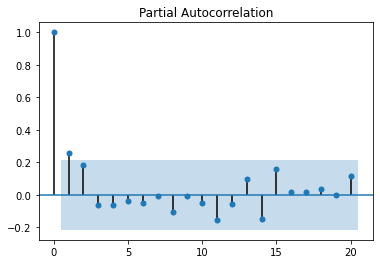

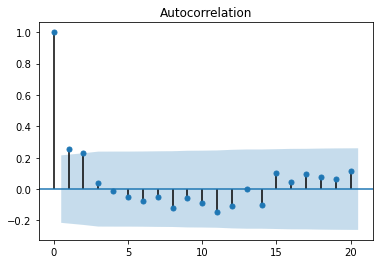

In [64]:
plot_pacf(df_cw['Confirmed']);
plot_acf(df_cw['Confirmed']);


Examining the PACF above, it seems that there is an AR process of order 1 or 2 in play. However, the ACF is not informative and we see some sinusoidal shape.

In [65]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [81]:
ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)
# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)
order_list = []
for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)
    
result_df = optimize_ARIMA(order_list, exog=df_cw['Confirmed'])
result_df

,"(p, d, q)",AIC
0,"(0, 1, 3)",75.748326
1,"(2, 1, 1)",75.751757
2,"(1, 1, 1)",76.680108
3,"(1, 1, 2)",76.977256
4,"(1, 1, 3)",77.397613
...,...,...
59,"(6, 1, 7)",91.397676
60,"(7, 1, 5)",92.507719
61,"(7, 1, 6)",93.942171
62,"(7, 1, 7)",95.351266


Once the function is done running, you should see that the order associated with the lowest AIC is (0, 1, 3). Therefore, this suggests are ARIMA model with an AR(0) process and a MA(3) process.

In [94]:
best_model = SARIMAX(df_cw['Confirmed'], order=(0, 1, 3)).fit()
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                   83
Model:               SARIMAX(0, 1, 3)   Log Likelihood                 -33.874
Date:                Sun, 24 Apr 2022   AIC                             75.748
Time:                        20:40:11   BIC                             85.375
Sample:                             0   HQIC                            79.613
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7834      2.792     -0.281      0.779      -6.255       4.688
ma.L2          0.0241      0.604      0.040      0.968      -1.161       1.209
ma.L3         -0.2399      0.714     -0.336      0.7

In [95]:
# Ljung-Box test
ljung_box, p_value = acorr_ljungbox(best_model.resid)
print(f'Ljung-Box test: {ljung_box[:10]}')
print(f'p-value: {p_value[:10]}')

Ljung-Box test: [0.0054673  0.01066466 0.1556302  0.17063051 0.48106769 0.59768682
 0.60952877 1.49228089 1.5332505  1.53329007]
p-value: [0.94105718 0.99468186 0.98441262 0.99656117 0.99280012 0.99643894
 0.99893847 0.99283528 0.9968925  0.99882787]


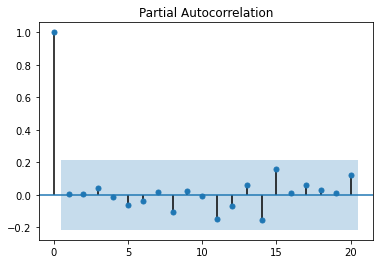

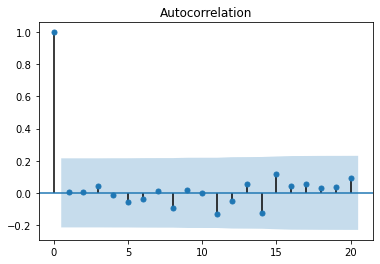

In [96]:
plot_pacf(best_model.resid);
plot_acf(best_model.resid);

In [98]:
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [100]:
model = ARIMA(df_cw['Confirmed'])
model_fit = model.fit(disp=0)

TypeError: __new__() missing 1 required positional argument: 'order'